### 使用Python玩微信

In [15]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Date    : 2018-02-26 08:12:39
# @Author  : guanglinzhou (xdzgl812@163.com)

import os
import itchat
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.font_manager import FontManager, FontProperties

# 登录微信
itchat.auto_login(hotReload=True)
friends = itchat.get_friends(update=True)

# print(friends[0])

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 腾原


#### 利用itchat.send()向某个UserName发送消息

In [8]:
itchat.send(u'https://zhuanlan.zhihu.com/p/26514576','filehelper')

<ItchatReturnValue: {'BaseResponse': {'Ret': 0, 'ErrMsg': '请求成功', 'RawMsg': '请求成功'}, 'MsgID': '17835393021974206', 'LocalID': '15196354635037'}>

In [3]:
# 对好友个性签名做个词云
import re
signatures=''
pattern=re.compile("1f\d.+")
sigList=[]
for friend in friends:
    signature=friend['Signature']
    if(signature!=None):
        signature=signature.strip().replace('span','').replace('class','').replace('emoji','')
        signature=pattern.sub('',signature)
#         print(signature)
        sigList.append(signature)
text=''.join(sigList)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.517 seconds.
Prefix dict has been built succesfully.


#### 利用jieba模块进行中文分词

In [9]:
import jieba
wordlist_jieba=jieba.cut(text,cut_all=True)
wl_space_split=' '.join(wordlist_jieba)

wl_space_split字符串中保存的是所有好友个性签名的分词，为保护隐私，查看前三十个

In [10]:
wl_space_split[:30]

'一个 个人 的 幸福 程度   取决 取决于 多 大程 大程'

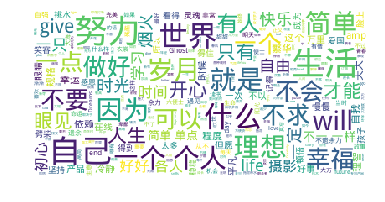

In [11]:
from wordcloud import WordCloud
import PIL.Image as Image
my_wordcloud = WordCloud(background_color="white", max_words=2000,
                         max_font_size=40, random_state=42,
                         font_path='/home/guanglinzhou/Documents/wechat_py/DroidSansFallbackFull.ttf').generate(wl_space_split)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

In [12]:
import numpy as np
d = os.getcwd()
#使用斯嘉丽经典图片做背景
alice_coloring=np.array(Image.open(os.path.join(d,'sijiali.jpg')))

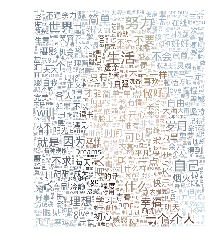

In [13]:
from wordcloud import WordCloud, ImageColorGenerator
my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42,
                         font_path='/home/guanglinzhou/Documents/wechat_py/DroidSansFallbackFull.ttf')\
    .generate(wl_space_split)

image_colors = ImageColorGenerator(alice_coloring)
plt.imshow(my_wordcloud.recolor(color_func=image_colors))
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

#### 自动回复功能

In [14]:
import itchat
import time
# 自动回复
# 封装好的装饰器，当接收到的消息是Text，即文字消息
@itchat.msg_register('Text')
def text_reply(msg):
    # 当消息不是由自己发出的时候
    if not msg['FromUserName'] == myUserName:
        # 发送一条提示给文件助手
        itchat.send_msg(u"[%s]收到好友@%s 的信息：%s\n" %
                        (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(msg['CreateTime'])),
                         msg['User']['NickName'],
                         msg['Text']), 'filehelper')
        # 回复给好友
        return u'[自动回复]您好，我现在有事不在，一会再和您联系。\n已经收到您的的信息：%s\n' % (msg['Text'])

if __name__ == '__main__':
    itchat.auto_login()

    # 获取自己的UserName
    myUserName = itchat.get_friends(update=True)[0]["UserName"]
    itchat.run()

itchat has already logged in.
Start auto replying.
Bye~
